### TRABAJO 1

In [1]:
#importación de librerías
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#extracción del dataset desde la propia librería
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [3]:
#svamos a separar en el 1 y 2 que son los números con los cuales vamos a trabajar
y = y.astype(int)
filtro = (y == 1) | (y == 2)
X_filtro = X[filtro] 
X_filtro = X_filtro /255.0 #dividimos de una vez para 255.0 para tener normalizado las imágenes, este dataset ya viene de 0 a 255
y_filtro = y[filtro]
total_1 = (y_filtro == 1).sum()
total_2 = (y_filtro == 2).sum()
print(f"Número de imágenes del número 1: {total_1}")
print(f"Número de imágenes del número 2: {total_2}")

Número de imágenes del número 1: 7877
Número de imágenes del número 2: 6990


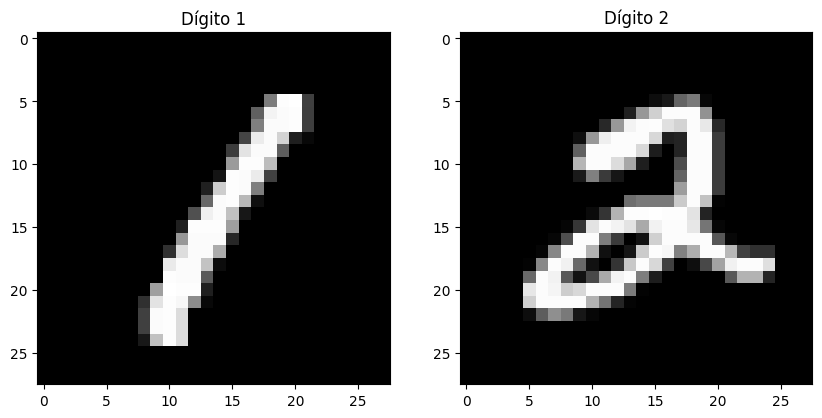

In [4]:
#muestra gráfica de cada digito, 
indice_1 = np.where(y_filtro == 1)[0][0]  #índice de los primeros numeros encontrados
indice_2 = np.where(y_filtro == 2)[0][0]

imagen_1 = X_filtro.iloc[indice_1].values.reshape(28, 28)
imagen_2 = X_filtro.iloc[indice_2].values.reshape(28, 28)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagen_1, cmap='gray', vmin=0, vmax=1)
axes[0].set_title('Dígito 1')
axes[1].imshow(imagen_2, cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Dígito 2')
plt.show()

In [5]:
#extracción de caracteristicas de los grados de simetria y la intensidades

X_filtro_np = np.array(X_filtro)
y_filtro_np = np.array(y_filtro)

grados_simetria = []  #almacenamos los grados de simetría y la intensidades
intensidades_promedio = []

for imagen in X_filtro_np:
    imagen_reshape = imagen.reshape(28, 28)
    simetria = 0
    intensidad_promedio = imagen.mean()  #basta con la media ya que la formula del pdf nos dice la sumatoria hasta 28 y dividio para 784 (28 x 28)
    for i in range(28): # aplicamos la formula dada en el pdf
        for j in range(28):
            simetria += abs(imagen_reshape[i, j] - imagen_reshape[i, 28 - 1 - j])
    grados_simetria.append(simetria)
    intensidades_promedio.append(intensidad_promedio)

#trabajamos con argloes de numpy para facilidad
grados_simetria = np.array(grados_simetria)
intensidades_promedio = np.array(intensidades_promedio)

In [6]:
print(f"Muestra de los grados de simetría: {grados_simetria}")
print(f"Muestra de las intensidades_promedio: {intensidades_promedio}")

Muestra de los grados de simetría: [113.34117647 140.18039216  70.36862745 ...  81.86666667  93.12156863
 114.        ]
Muestra de las intensidades_promedio: [0.08570928 0.14806423 0.08826531 ... 0.16528611 0.08622949 0.19394258]


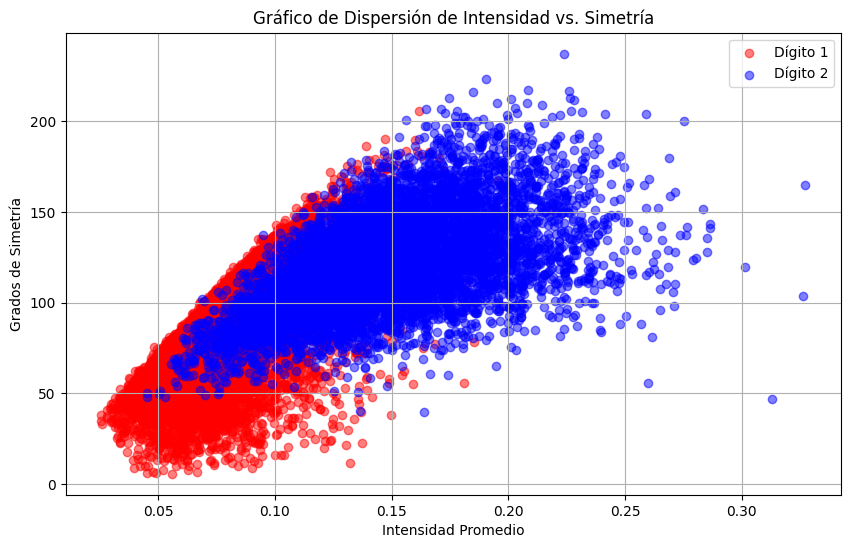

In [8]:
#Procedemos a relaizar un grafico de dispersion entre la intensidad vs la simetria

# selecccionamos las etiquetas de 1 y del 2
etiqueta1 = (y_filtro_np == 1)
etiqueta2 = (y_filtro_np == 2)
plt.figure(figsize=(10, 6))

plt.scatter(intensidades_promedio[etiqueta1], grados_simetria[etiqueta1], c='red', label='Dígito 1', alpha=0.5)
plt.scatter(intensidades_promedio[etiqueta2], grados_simetria[etiqueta2], c='blue', label='Dígito 2', alpha=0.5)

plt.xlabel('Intensidad Promedio')
plt.ylabel('Grados de Simetría')
plt.title('Gráfico de Dispersión de Intensidad vs. Simetría')
plt.legend()
plt.grid(True)

plt.show()


In [11]:
#Proceso de entrenamiento
# debemos agrupar en un unico conjuntos de caracteristicas los grados de simetria y las intensidades promedio
X = np.column_stack((intensidades_promedio,grados_simetria))
#dividimos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_filtro_np, test_size=0.2, random_state=42)

#vamos a entreanr con un clasificador de regresion logisticas
clf = LogisticRegression()
clf.fit(X_train, y_train)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 86.79%


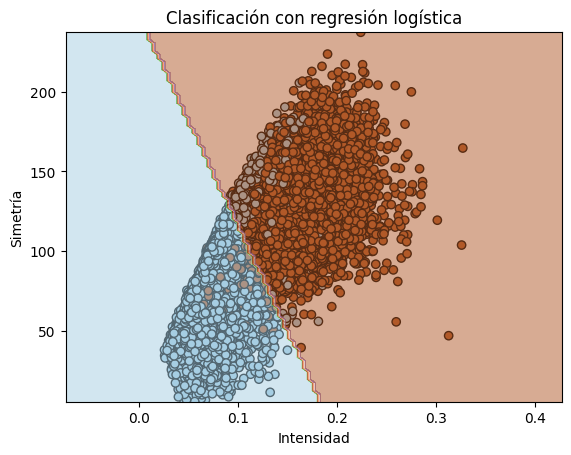

In [10]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y_filtro_np, cmap=plt.cm.Paired, edgecolor='k')

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

plt.xlabel('Intensidad')
plt.ylabel('Simetría')
plt.title('Clasificación con regresión logística')
plt.show()


In [12]:
#vamos a entrenar con otro algoritmo el SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 88.47%


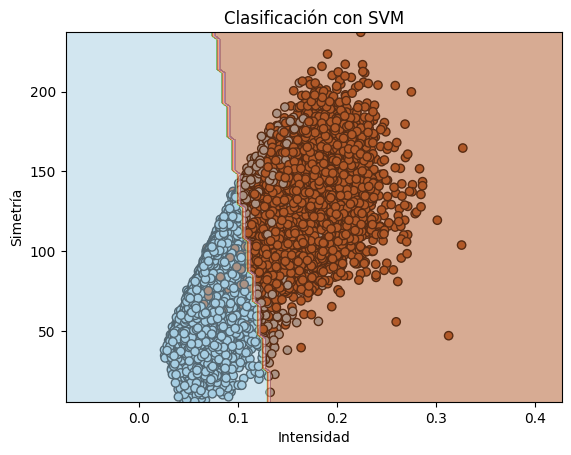

In [13]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y_filtro_np, cmap=plt.cm.Paired, edgecolor='k')

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

plt.xlabel('Intensidad')
plt.ylabel('Simetría')
plt.title('Clasificación con SVM')
plt.show()